In [1]:
!pip install opencv-python-headless pillow


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import io
from IPython.display import Image as IPImage, display


In [6]:
from google.colab import files
uploaded = files.upload()

# Load the image (make sure to change the filename to the uploaded file name)
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


Saving bmw-car-front-bonnet-radiator-grill-F3G801.jpg to bmw-car-front-bonnet-radiator-grill-F3G801.jpg


In [7]:
def apply_filter(img, filter_type):
    if filter_type == 'grayscale':
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif filter_type == 'blur':
        return cv2.GaussianBlur(img, (15, 15), 0)
    elif filter_type == 'sharpen':
        kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
        return cv2.filter2D(img, -1, kernel)
    elif filter_type == 'invert':
        return cv2.bitwise_not(img)
    elif filter_type == 'emboss':
        kernel = np.array([[ -2, -1, 0], [-1, 1, 1], [0, 1, 2]])
        return cv2.filter2D(img, -1, kernel)
    elif filter_type == 'sepia':
        kernel = np.array([[0.272, 0.534, 0.131], [0.349, 0.686, 0.168], [0.393, 0.769, 0.189]])
        sepia = cv2.transform(img, kernel)
        return np.clip(sepia, 0, 255)
    elif filter_type == 'sketch':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        inv = cv2.bitwise_not(gray)
        blur = cv2.GaussianBlur(inv, (21, 21), 0)
        return cv2.divide(gray, 255 - blur, scale=256)
    elif filter_type == 'cartoon':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 5)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 9, 9)
        color = cv2.bilateralFilter(img, 9, 300, 300)
        return cv2.bitwise_and(color, color, mask=edges)
    elif filter_type == 'edge':
        return cv2.Canny(img, 100, 200)
    elif filter_type == 'threshold':
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        return binary
    elif filter_type == 'bright':
        return cv2.convertScaleAbs(img, alpha=1, beta=50)
    elif filter_type == 'contrast':
        return cv2.convertScaleAbs(img, alpha=1.5, beta=0)
    else:
        return img


Original Image:


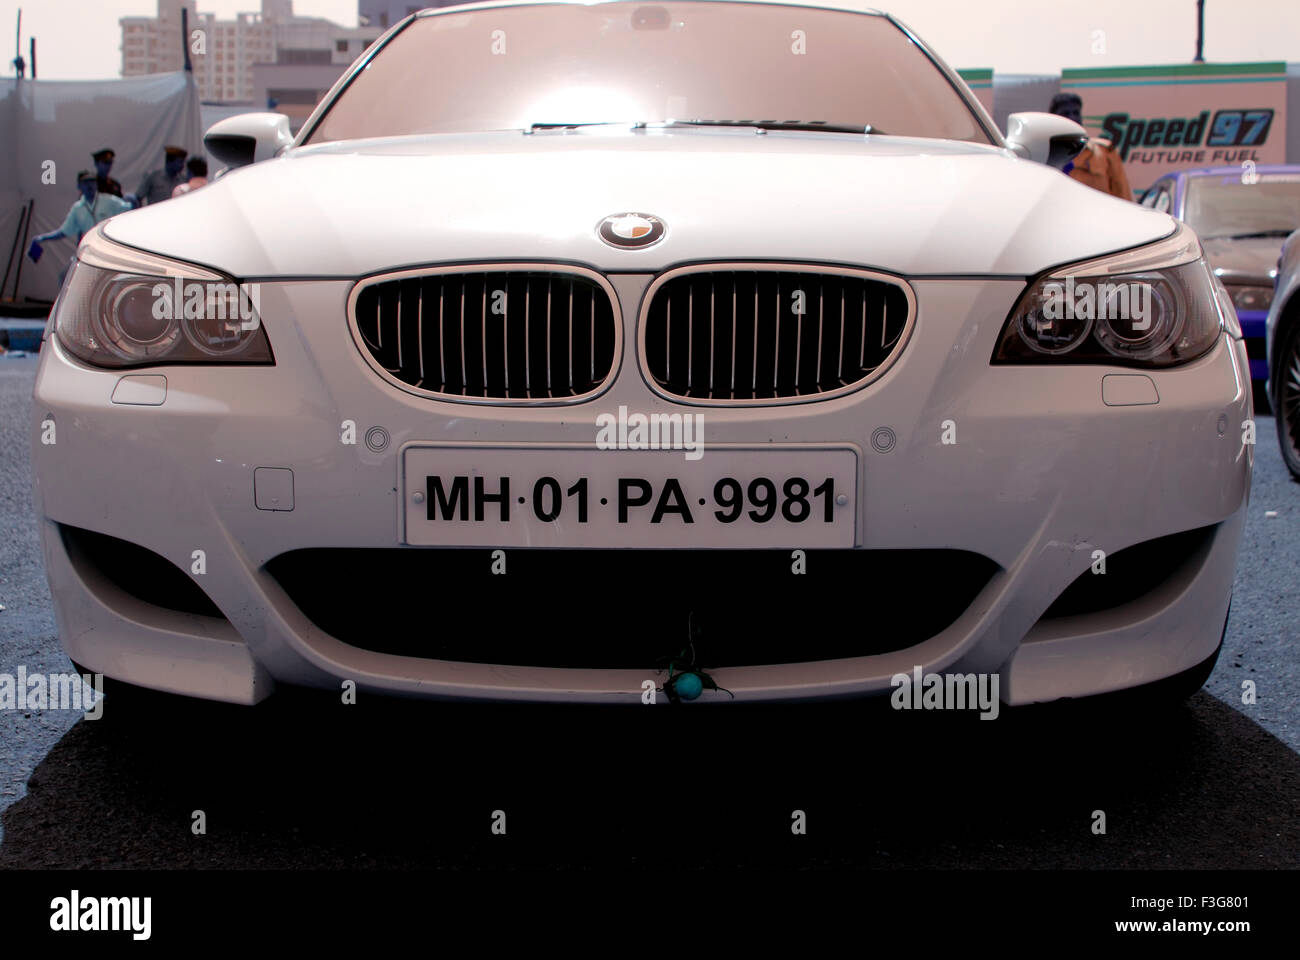

Filtered Image (threshold):


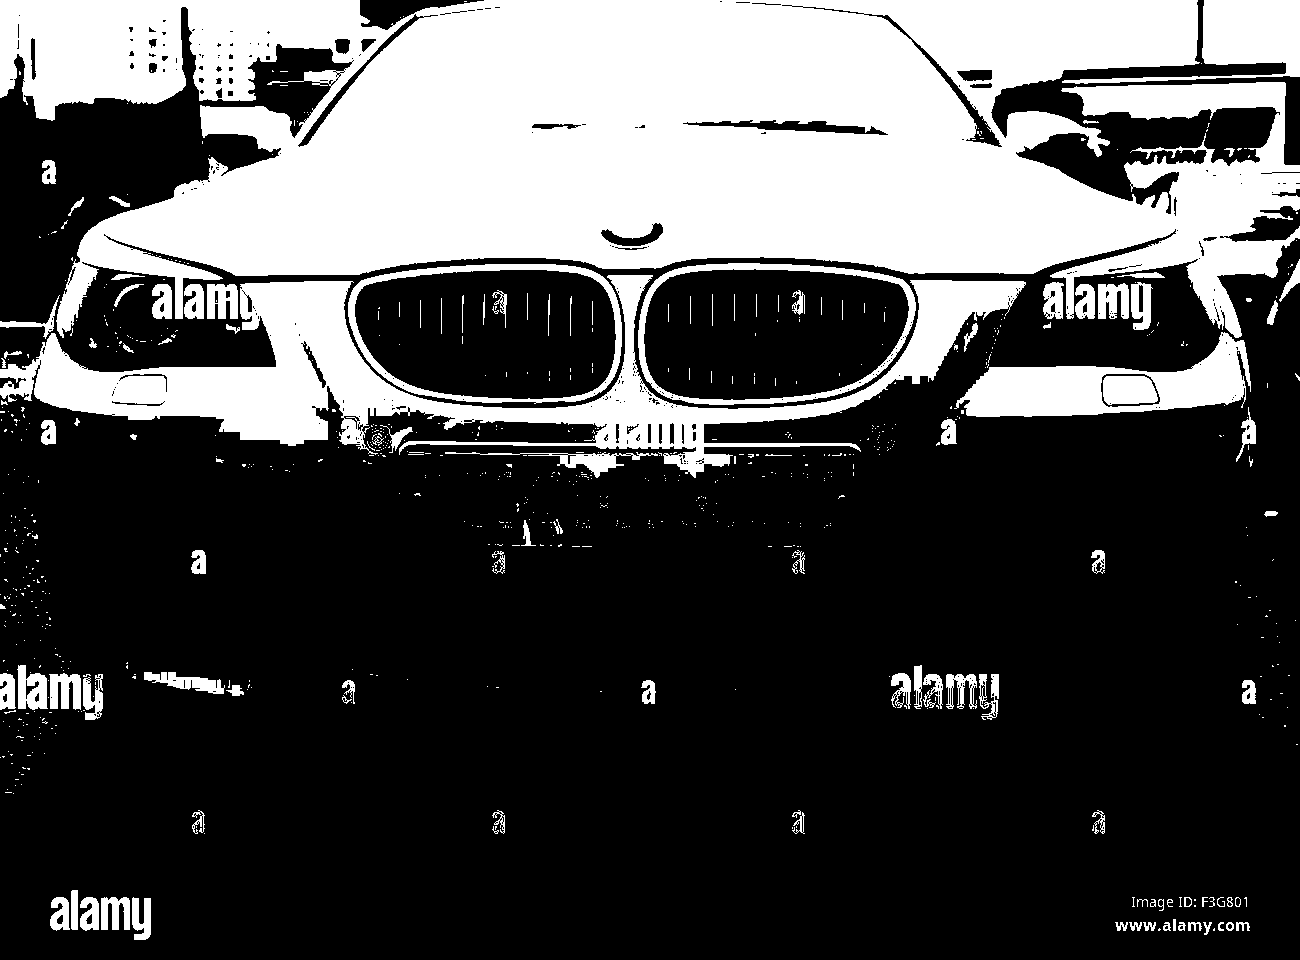

In [8]:
# Apply filter (e.g., 'sepia')
filtered_img = apply_filter(img, 'threshold')

# Display original image
print("Original Image:")
cv2_imshow(img)

# Display filtered image
print("Filtered Image (threshold):")
cv2_imshow(filtered_img)
